
# Anomalies Detection using Self Organizing Maps (SOMs)

In [2]:
pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=be6d9d6ece689541881bf8320231bca04ac941f09508a3cec4a4439729b84b57
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from pylab import plot, axis, show, pcolor, colorbar, bone
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
data = pd.read_csv('assets/Credit_Card_Applications.csv')
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [7]:
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values
print(pd.DataFrame(X))
print(pd.DataFrame(y))

      0      1       2    3     4    5      6    7    8     9    10   11  \
0    1.0  22.08  11.460  2.0   4.0  4.0  1.585  0.0  0.0   0.0  1.0  2.0   
1    0.0  22.67   7.000  2.0   8.0  4.0  0.165  0.0  0.0   0.0  0.0  2.0   
2    0.0  29.58   1.750  1.0   4.0  4.0  1.250  0.0  0.0   0.0  1.0  2.0   
3    0.0  21.67  11.500  1.0   5.0  3.0  0.000  1.0  1.0  11.0  1.0  2.0   
4    1.0  20.17   8.170  2.0   6.0  4.0  1.960  1.0  1.0  14.0  0.0  2.0   
..   ...    ...     ...  ...   ...  ...    ...  ...  ...   ...  ...  ...   
685  1.0  31.57  10.500  2.0  14.0  4.0  6.500  1.0  0.0   0.0  0.0  2.0   
686  1.0  20.67   0.415  2.0   8.0  4.0  0.125  0.0  0.0   0.0  0.0  2.0   
687  0.0  18.83   9.540  2.0   6.0  4.0  0.085  1.0  0.0   0.0  0.0  2.0   
688  0.0  27.42  14.500  2.0  14.0  8.0  3.085  1.0  1.0   1.0  0.0  2.0   
689  1.0  41.00   0.040  2.0  10.0  4.0  0.040  0.0  1.0   1.0  0.0  1.0   

        12  
0    100.0  
1    160.0  
2    280.0  
3      0.0  
4     60.0  
..     ..

Normalization

In [9]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


Defining the Hyper Parameters

In [10]:
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

In [11]:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(X)

# Training
som.train_random(X, iterations)

In [15]:
wts = som.get_weights()
print(wts.shape)
som.distance_map()

(10, 10, 13)


array([[0.24317798, 0.36920249, 0.36895965, 0.5866275 , 0.46129409,
        0.33906616, 0.52152567, 0.53449351, 0.37577808, 0.20120164],
       [0.59182676, 0.81660248, 0.75161537, 0.70241868, 0.78718532,
        0.61568199, 0.6984193 , 1.        , 0.55670088, 0.30933878],
       [0.56853753, 0.75177798, 0.72135122, 0.90002587, 0.70119062,
        0.91918741, 0.7482523 , 0.75104628, 0.58839841, 0.3324775 ],
       [0.37662287, 0.64181512, 0.74162949, 0.75568275, 0.78203105,
        0.73239274, 0.94485646, 0.91961732, 0.80820037, 0.48588404],
       [0.34961834, 0.56504471, 0.86592871, 0.69874769, 0.6895179 ,
        0.83519429, 0.90196076, 0.83002331, 0.79356335, 0.46054709],
       [0.40101761, 0.65645205, 0.65302516, 0.81152784, 0.67191582,
        0.69346859, 0.63597477, 0.7459411 , 0.53004239, 0.2835232 ],
       [0.44500826, 0.74157142, 0.77587394, 0.64190182, 0.7624175 ,
        0.74178781, 0.78091175, 0.58955473, 0.54292275, 0.37338489],
       [0.41598237, 0.63639787, 0.9715635

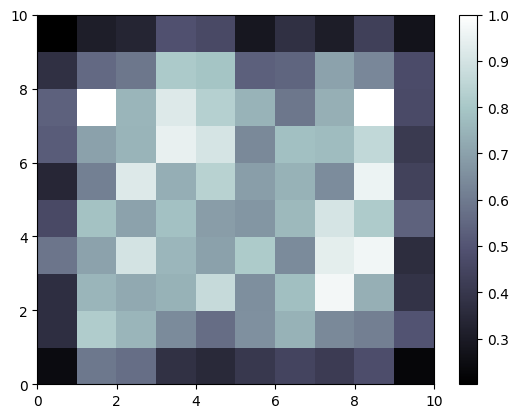

In [17]:
bone()
pcolor(som.distance_map().T) # Distance map as background
colorbar()
show()

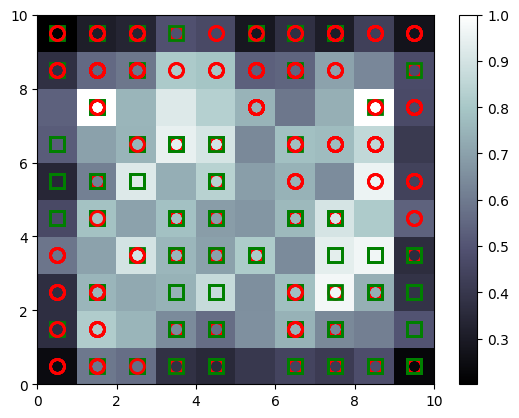

In [18]:
bone()
pcolor(som.distance_map().T)
colorbar()
# if the observation is fraud then red circular color or else green square
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

1. The markers used to distinguish frauds are:
  - Red Circular are Class 0 as fraud customers
  - Green Square are Class 1 as not fraud customers
2. i is the index and x is the vector of each value and for each x first get the winning node
3. The co-ordinates of the winning node are w[0] and w[1], 0.5 is added to center the marker
4. s is a square and marker face color is the inside color of the marker


In [19]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(1,
              8): [array([1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
                     0.375     , 0.05561404, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      ]), array([1.        , 0.2793985 , 0.125     , 0.5       , 0.23076923,
                     0.375     , 0.01754386, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.116     ]), array([1.        , 0.44240602, 0.17857143, 0.5       , 0.15384615,
                     0.5       , 0.07894737, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.0705    ]), array([1.        , 0.14030075, 0.08928571, 0.5       , 0.        ,
                     0.        , 0.00298246, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      ]), array([1.        , 0.05263158, 0.10714286, 0.5       , 0.23076923,
                     0.375     , 0.00140351, 0.    

In [20]:
# Taking some of the red circular from the heat map and mapping as Frauds:

frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)
frauds1 = sc.inverse_transform(frauds)
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,20.67,0.835,1.0,8.0,4.0,2.000,0.0,0.0,0.0,1.0,1.0,240.0
1,1.0,19.17,0.000,1.0,7.0,5.0,0.000,0.0,0.0,0.0,1.0,1.0,500.0
2,1.0,30.58,2.710,1.0,7.0,4.0,0.125,0.0,0.0,0.0,1.0,1.0,80.0
3,1.0,39.17,2.500,1.0,3.0,8.0,10.000,0.0,0.0,0.0,1.0,1.0,200.0
4,1.0,22.17,0.585,1.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,2.0,100.0
5,1.0,24.58,13.500,1.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,2.0,184.0
6,1.0,51.83,3.000,1.0,1.0,1.0,1.500,0.0,0.0,0.0,0.0,2.0,180.0
7,1.0,26.83,0.540,2.0,4.0,1.0,0.000,0.0,0.0,0.0,0.0,2.0,100.0
8,1.0,50.75,0.585,2.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,2.0,145.0
9,1.0,32.42,2.165,1.0,4.0,1.0,0.000,0.0,0.0,0.0,0.0,2.0,120.0
